# Evaluation

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from pycm import ConfusionMatrix

from tensorflow.keras.models import load_model

## Insight in the training process

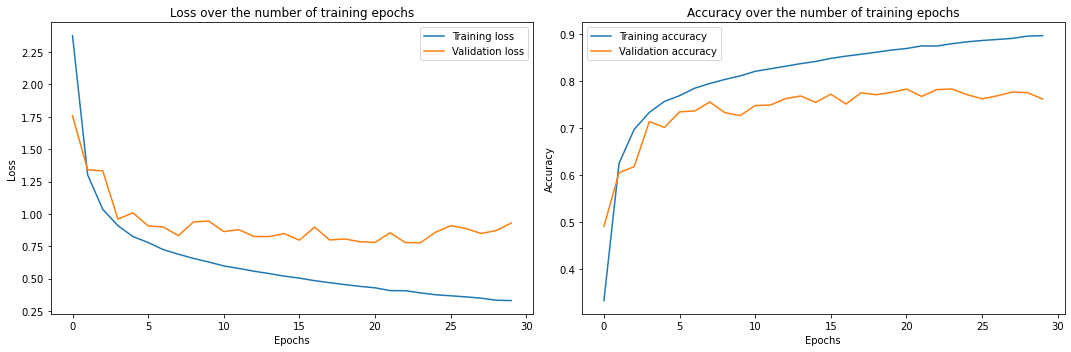

In [3]:
# Fetch training history
training_history = np.load("../results/(resnet-wavenet-base)_training_history.npy", allow_pickle=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot loss results
ax1.plot(training_history.item().get("loss"), label="Training loss")
ax1.plot(training_history.item().get("val_loss"), label="Validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Loss over the number of training epochs")
ax1.legend()

# Plot accuracy results
ax2.plot(training_history.item().get("accuracy"), label="Training accuracy")
ax2.plot(training_history.item().get("val_accuracy"), label="Validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy over the number of training epochs")
ax2.legend()

plt.tight_layout()
plt.show()

In [4]:
# Save training and validation accuracy for Latex plot
d = {'epochs': list(range(1,31)), 
     'train_acc': training_history.item().get("accuracy"), 
     'val_acc': training_history.item().get("val_accuracy")}

df = pd.DataFrame(data=d)
df.to_csv('../img_data/wavenet_comparison.csv', index=False)

## Performance on test data

In [8]:
def process_predictions(test_predictions, test_labels, one_hot_mapping):
    predictions = []
    labels = []

    for pred, label in zip(test_predictions, test_labels):
        pred_index = np.argmax(pred)
        predictions.append(one_hot_mapping[pred_index])

        truth_index = np.argmax(label)
        labels.append(one_hot_mapping[truth_index])
        
    return predictions, labels    

In [6]:
# Load test predictions
test_predictions = np.load("../results/(resnet-wavenet-base)_predictions.npy")

# Load test labels
test_labels = np.load("../results/(resnet-wavenet-base)_val_labels.npy")

# Load one-hot-mapping
one_hot_mapping = np.load("one_hot_mapping.npy", allow_pickle=True)

In [9]:
# Process predictions to their original labels
predictions, labels = process_predictions(test_predictions, test_labels, one_hot_mapping)

In [10]:
# Show the classification report
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

    backward       0.94      0.66      0.77       549
         bed       0.83      0.54      0.66       665
        bird       0.67      0.78      0.72       681
         cat       0.73      0.74      0.73       670
         dog       0.92      0.52      0.67       702
        down       0.89      0.64      0.75      1293
       eight       0.91      0.77      0.84      1250
        five       0.86      0.72      0.78      1337
      follow       0.77      0.62      0.69       521
     forward       0.55      0.65      0.60       514
        four       0.57      0.89      0.69      1230
          go       0.81      0.57      0.67      1280
       happy       0.95      0.73      0.82       678
       house       0.91      0.82      0.86       697
       learn       0.42      0.76      0.54       520
        left       0.72      0.83      0.77      1254
      marvin       0.85      0.67      0.75       693
        nine       0.87    

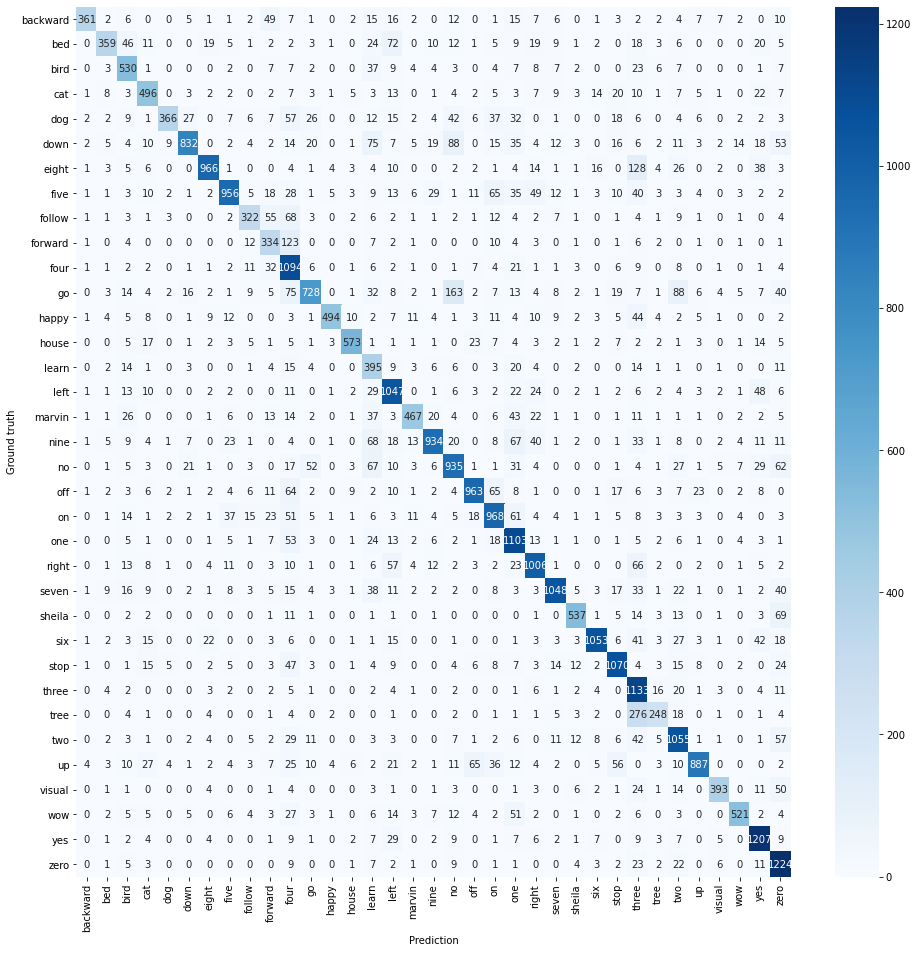

In [11]:
# Construct and show confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

plt.figure(figsize = (16,16))
sn.heatmap(conf_matrix, annot=True, xticklabels=one_hot_mapping, yticklabels=one_hot_mapping, fmt='g', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Ground truth")
plt.show()

## FAR - FRR results

In [8]:
cm = ConfusionMatrix(labels, predictions)
cm.stat(overall_param=["FPR Macro","FPR Micro","FNR Macro","FNR Micro"],class_param=None)

Overall Statistics : 

FNR Macro                                                         0.22034
FNR Micro                                                         0.21261
FPR Macro                                                         0.00626
FPR Micro                                                         0.00625

Class Statistics :

Classes                                                           backward      bed           bird          cat           dog           down          eight         five          follow        forward       four          go            happy         house         learn         left          marvin        nine          no            off           on            one           right         seven         sheila        six           stop          three         tree          two           up            visual        wow           yes           zero          
ACC(Accuracy)                                                     0.99499       0.99017       0.98403  

/home/djesse/anaconda3/envs/asr/lib/python3.8/site-packages/pycm/pycm_obj.py:182: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


## Model summary

In [16]:
model = load_model('../results/(resnet-wavenet-base)_model.hdf5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 138, 40)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1, 138, 45)   16200       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1, 138, 45)   18270       conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1, 138, 45)   180         conv2d_1[0][0]                   
______________________________________________________________________________________________